## Pandas Primer part 3
------------------

In [1]:
import pandas as pd
import numpy as np
#import pandas_datareader.data as web
import datetime as dt
import seaborn as sns; sns.set()
import math
import zmq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import quandl as ql
ql.ApiConfig.api_key= "9Djob1GoNyL-pEK4-vEk"

### Important link to learn Merge, join, Concatenate 

    1. Merge: Similar to SQL join operation, using relational data
    2. concat: glues or stacks together objects along the axis
    3. combine_first: enables splicing together overlapping data to fill 
       in missing values in one object with values from another

<table class="table table-striped table-bordered">
<tr>
<th style="width:30%">Argument</th><th style="width:70%">Description</th>
</tr>
<tr>
<td>left</td>
<td>Dataframe to be merged on the left side</td>
</tr>
<tr>
<td>right</td>
<td>Dataframe to be merged on the right side</td>
</tr>
<tr>
<td>how</td>
<td>one of 'inner' or 'outer', 'left', 'right', 'inner' by default</td>
</tr>
<tr>
<td>on</td>
<td>Column name for the merge, Must be found on both Dataframe objects.</td>
</tr>
<tr>
<td>left_on</td>
<td>Columns on the left Dataframe to use as join keys</td>
</tr>
<tr>
<td>right_on</td>
<td>Columns on the right Dataframe to use as join keys</td>
</tr>
<tr>
<td>sort</td>
<td>sort merged data by lexicographically by join keys, true by default</td>
</tr>
<tr>
<td>suffixes</td>
<td>Tupple of string values to append to column names in case of overlap; defaults('_x','_y')</td>
</tr>

</table>

[Merge, Join, and Concatenate](http://pandas.pydata.org/pandas-docs/stable/merging.html)

<a id='cell38'></a>
## Apply function

In [2]:
frame11 = pd.DataFrame(np.arange(9).reshape(3,3), 
                       columns = ['A','B','C'], index = ['a','b','c'])
frame11

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8


<a id="cell37"></a>

In [3]:
def f(x):
    return x ** 2

In [4]:
frame11.apply(f)

,A,B,C
a,0,1,4
b,9,16,25
c,36,49,64


<a id='cell39'></a>

In [5]:
frame11.apply(lambda x: x ** 2)

,A,B,C
a,0,1,4
b,9,16,25
c,36,49,64


<a id='cell40'></a>
## Map function

Map values of Series using input correspondence

** Note: The elements of one Series should match the index elements of another !!!**

In [6]:
xx = pd.Series([1,2,3], index = ['one','two','three'])
xx

one      1
two      2
three    3
dtype: int64

In [7]:
yy = pd.Series(['foo','bar','baz'], index = [1,2,3])
yy

1    foo
2    bar
3    baz
dtype: object

In [8]:
xx.map(yy)

one      foo
two      bar
three    baz
dtype: object

<a id='cell41'></a>
## Applymap function

It operates element wise, like map for each series in the DataFrame

In [9]:
df34 = pd.DataFrame(np.random.randn(3,3))
df34

,0,1,2
0,-0.679650,0.288541,0.746801
1,0.217052,-1.675438,-0.252653
2,0.497751,-1.198338,-1.415801


In [10]:
df34 = df34.applymap(lambda x: '{:.2f}'.format(x))
df34

,0,1,2
0,-0.68,0.29,0.75
1,0.22,-1.68,-0.25
2,0.50,-1.20,-1.42


In [11]:
framex = pd.DataFrame([[4300,1350],[4250,1500],[4500,1700],[5000,2000]], index = [2017,2018,2019,2020], 
                   columns = ['COGS','Inventory'])
framex

,COGS,Inventory
2017,4300,1350
2018,4250,1500
2019,4500,1700
2020,5000,2000


In [12]:
def Inventory_days(COGS, Inventory):
    invdays = (Inventory/COGS)*365
    return invdays

In [13]:
framex['Inventory Days'] = Inventory_days(framex['COGS'],framex['Inventory'])

In [14]:
framex

,COGS,Inventory,Inventory Days
2017,4300,1350,114.593023
2018,4250,1500,128.823529
2019,4500,1700,137.888889
2020,5000,2000,146.000000


In [15]:
framey = pd.DataFrame([[0.7,1350],[0.73,1500],[0.68,1700],[0.75,2000]], index = [2017,2018,2019,2020], 
                   columns = ['COGS%','Inventory'])
framez = pd.Series([6000,5800,6100,5900], index = [2017,2018,2019,2020],name='Sales' )


In [16]:
framey['Inventory Days'] = Inventory_days((framey['COGS%']*framez),framey['Inventory'])

In [17]:
framey

,COGS%,Inventory,Inventory Days
2017,0.70,1350,117.321429
2018,0.73,1500,129.310345
2019,0.68,1700,149.590164
2020,0.75,2000,164.971751


<a id='cell42'></a>
## Useful Functions in Pandas:

<table class="table table-striped table-bordered">
<tr>
<th style="width:30%">Method</th><th style="width:70%">Description</th>
</tr>
<tr>
<td>median</td>
<td>Arithmetic median (50% percentile) of values</td>
</tr>
<tr>
<td>mad</td>
<td>Mean absolute deviation from mean value</td>
</tr>
<tr>
<td>var</td>
<td>Sample variance of values</td>
</tr>
<tr>
<td>std</td>
<td>Sample standard deviation of values</td>
</tr>
<tr>
<td>skew</td>
<td>Sample skewness</td>
</tr>
<tr>
<td>kurt</td>
<td>Sample kurtosis</td>
</tr>
<tr>
<td>pct_change</td>
<td>Percent change over a period of time</td>
</tr>
<tr>
<td>unique</td>
<td>Array with unique values in the series</td>
</tr>
<tr>
<td>value_counts</td>
<td>Computes value frequencies</td>
</tr>
<tr>
<td>isin</td>
<td>Boolean result given target values</td>
</tr>
<tr>
<td>dropna</td>
<td>Filter axis labels based on whether values for each label have missing data</td>
</tr>
<tr>
<td>fillna</td>
<td>fill in missing data with some value or using interpolation method such as 'ffill' or 'bfill'</td>
</tr>
<tr>
<td>isnull</td>
<td>Return like type object containing boolean values indicating which values are missing</td>
</tr>
<tr>
<td>notnull</td>
<td>negation of isnull</td>
</tr>
</table>

In [18]:
# Putting all together in Pandas
datos = pd.DataFrame({'Qu1': [1,3,4,3,4],
                      'Qu2': [2,3,1,2,3],
                      'Qu3': [1,5,2,4,4]})
datos

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


<a id='cell43'></a>

In [19]:
resultado = datos.apply(pd.value_counts).fillna(0)
resultado

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


<a id='cell44'></a>

In [20]:
from numpy import nan as NA
dato = pd.DataFrame([[1,6.5,3],[1,NA,NA],[NA,NA,NA],[NA,6.5,3]])
dato[4] = NA
dato

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


<a id='cell45'></a>

In [21]:
dato.dropna()

,0,1,2,4


In [22]:
dato.dropna(how = 'all')

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
dato.dropna(how = 'all',axis = 1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


<a id='cell46'></a>

In [24]:
dato.fillna(0)

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [25]:
dato.fillna({0:'uno',1:'dos',2:'tres',4:'cuatro'})

,0,1,2,4
0,1.0,6.5,3.0,cuatro
1,1.0,dos,tres,cuatro
2,uno,dos,tres,cuatro
3,uno,6.5,3.0,cuatro


In [26]:
# if you want the changes to become permanent you can you 'inplace'

dato.fillna({0:'uno',1:'dos',2:'tres',4:'cuatro'}, inplace = True)

In [27]:
datoo = pd.DataFrame([[1,6.5,3],[1,NA,NA],[NA,NA,NA],[NA,6.5,3],[NA,NA,NA]])
datoo

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0
4,NaN,NaN,NaN


In [28]:
datoo.fillna(method = 'ffill', limit = 2)
# Everytime that it has an NA to fillin it 
# will do a maximum of two fillings!!!

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0
4,NaN,6.5,3.0


## Basic plotting

<a id='cell48'></a>

array([[<AxesSubplot:title={'center':'N1'}>,
        <AxesSubplot:title={'center':'N2'}>],
       [<AxesSubplot:title={'center':'N3'}>,
        <AxesSubplot:title={'center':'N4'}>]], dtype=object)

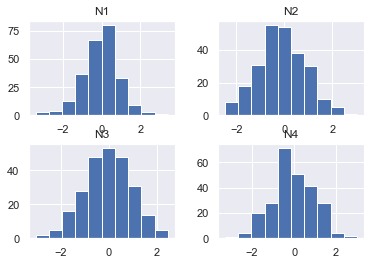

In [29]:
frame113 = pd.DataFrame(np.random.randn(250,4),
                       columns = ['N1','N2','N3','N4'])
frame113.hist()

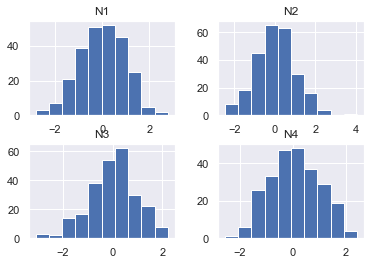

In [30]:
frame13 = pd.DataFrame(np.random.randn(250,4),
                       columns = ['N1','N2','N3','N4'])
frame13.hist();

<a id='cell49'></a>

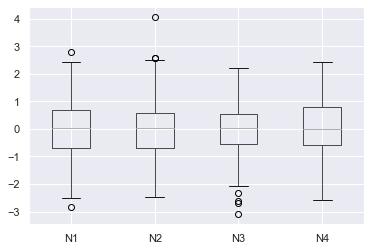

In [31]:
frame13.boxplot();

<a id='cell47'></a>

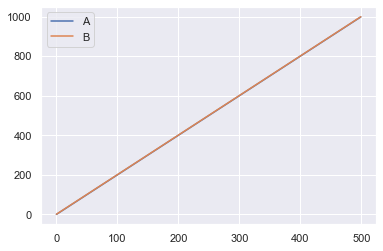

In [32]:
frame12 = pd.DataFrame(np.arange(1000).reshape(500,2), 
                       columns = ['A','B'])
frame12.plot();

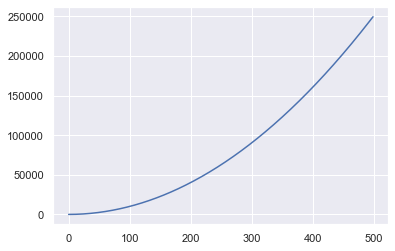

In [33]:
frame12['A'].cumsum().plot();

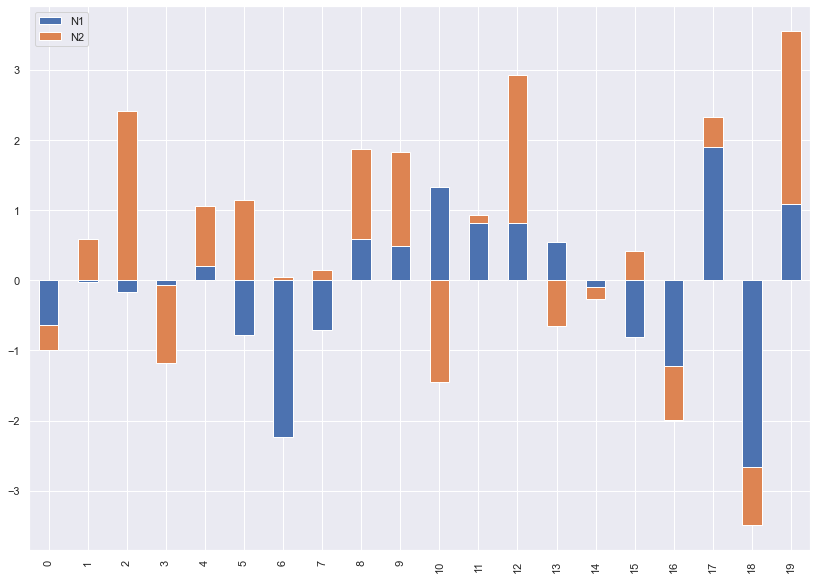

In [34]:
frame14 = pd.DataFrame(np.random.randn(20,2),columns = ['N1','N2'])
frame14.plot(kind ='bar', stacked = True,figsize=(14,10));

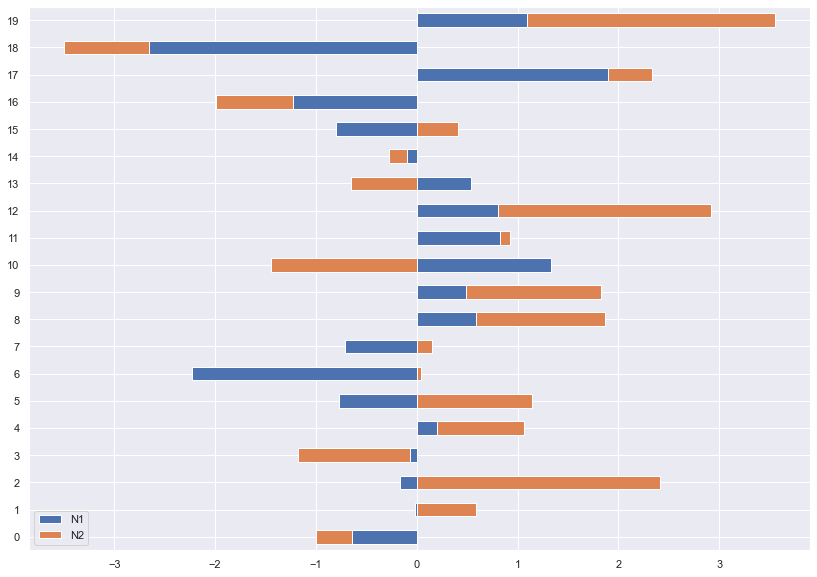

In [35]:
frame14.plot(kind ='barh', stacked = True,figsize=(14,10));

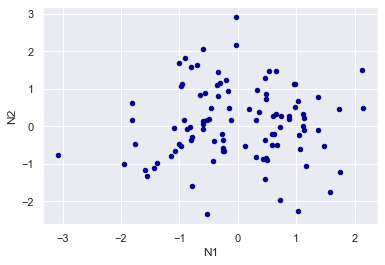

In [36]:
frame15 = pd.DataFrame(np.random.randn(100,2),columns = ['N1','N2'])
frame15.plot.scatter(x = 'N1', y = 'N2', c ='DarkBlue');

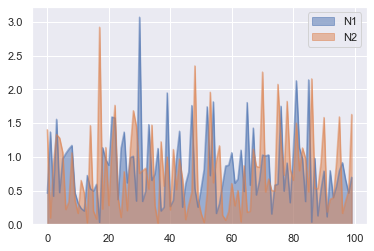

In [37]:
np.abs(frame15).plot(kind ='area', stacked = False);

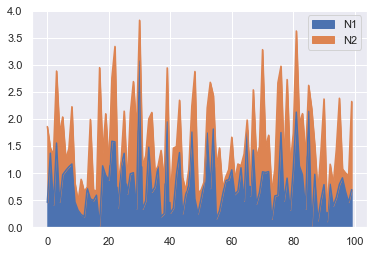

In [38]:
np.abs(frame15).plot(kind ='area', stacked = True);

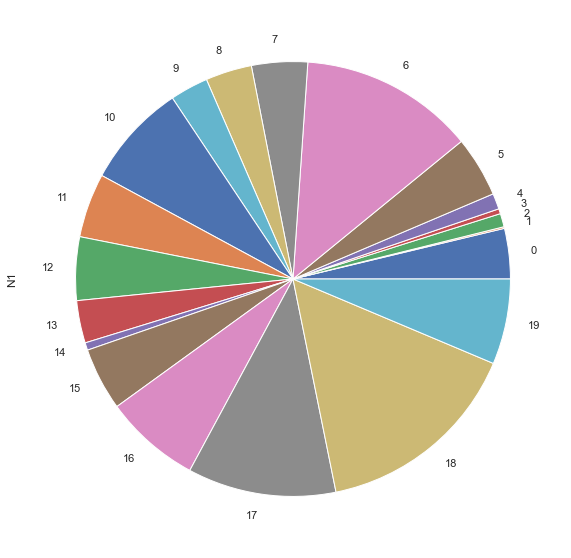

In [39]:
np.abs(frame14['N1']).plot(kind ='pie',figsize=(10,10));